In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0fxnlkxX7mmh89L5xnsN")
project = rf.workspace("tabusetdah").project("helmet-detection-2-qxgjl")
version = project.version(5)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cyc

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to helmet-detection-2-5 in yolov8:: 100%|██████████| 5319/5319 [00:02<00:00, 1784.71it/s]


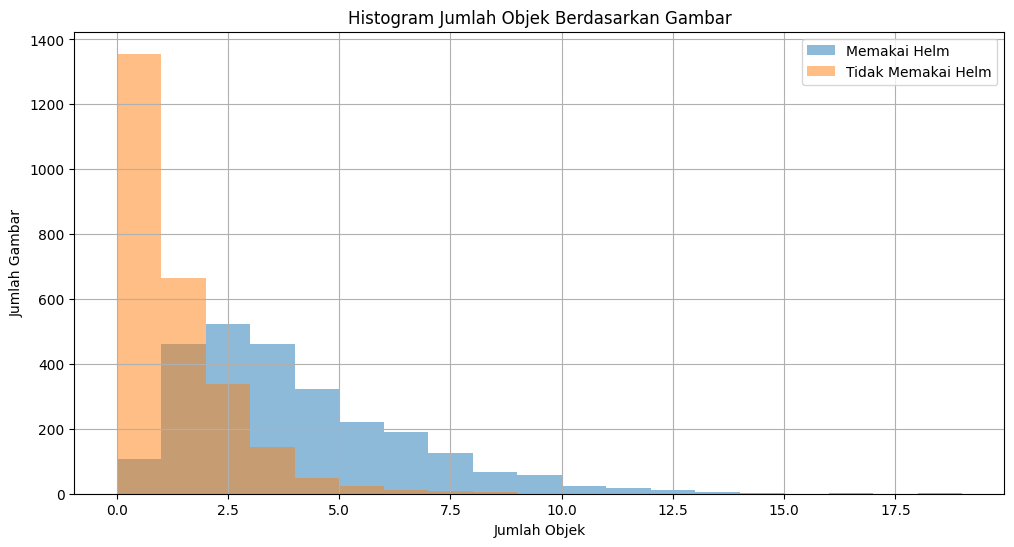

In [8]:
import os
import glob
import matplotlib.pyplot as plt
from collections import defaultdict

# Define paths
train_labels_path = '/content/helmet-detection-2-5/train/labels'
test_labels_path = '/content/helmet-detection-2-5/test/labels'
valid_labels_path = '/content/helmet-detection-2-5/valid/labels'

# Function to count objects in label files
def count_objects(label_files):
    object_counts = defaultdict(lambda: [0, 0])

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                object_counts[file][class_id] += 1

    return object_counts

# Gather label files
train_label_files = glob.glob(os.path.join(train_labels_path, '*.txt'))
test_label_files = glob.glob(os.path.join(test_labels_path, '*.txt'))
valid_label_files = glob.glob(os.path.join(valid_labels_path, '*.txt'))

# Count objects
train_counts = count_objects(train_label_files)
test_counts = count_objects(test_label_files)
valid_counts = count_objects(valid_label_files)

# Combine counts from train, test, and valid sets
combined_counts = defaultdict(lambda: [0, 0])

for key, value in train_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

for key, value in test_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

for key, value in valid_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

# Plot histogram
def plot_histogram(counts, title):
    class_0_counts = [count[0] for count in counts.values()]
    class_1_counts = [count[1] for count in counts.values()]

    plt.figure(figsize=(12, 6))

    plt.hist(class_0_counts, bins=range(max(class_0_counts)+1), alpha=0.5, label='Memakai Helm')
    plt.hist(class_1_counts, bins=range(max(class_1_counts)+1), alpha=0.5, label='Tidak Memakai Helm')

    plt.xlabel('Jumlah Objek')
    plt.ylabel('Jumlah Gambar')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot combined histogram
plot_histogram(combined_counts, 'Histogram Jumlah Objek Berdasarkan Gambar')

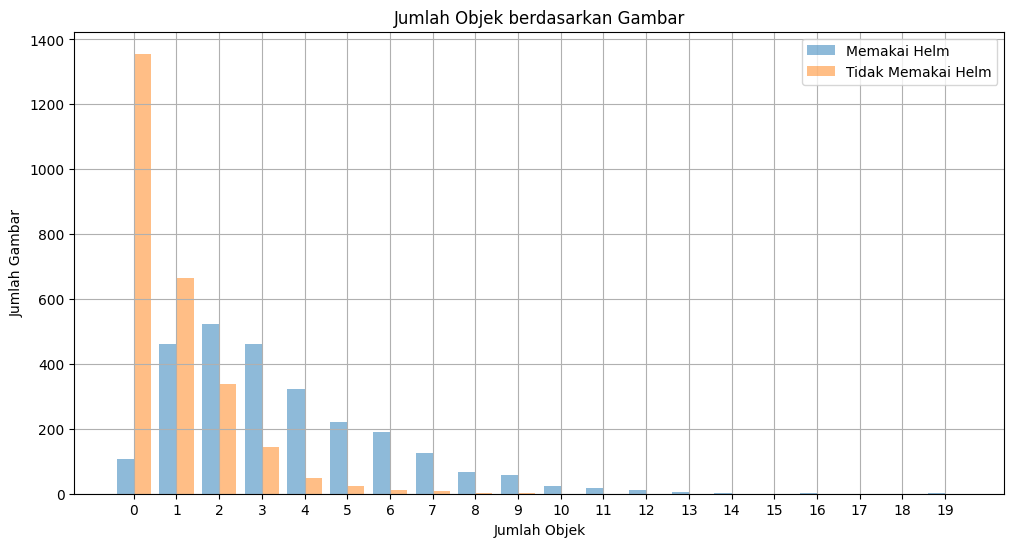

In [7]:
train_labels_path = '/content/helmet-detection-2-5/train/labels'
test_labels_path = '/content/helmet-detection-2-5/test/labels'
valid_labels_path = '/content/helmet-detection-2-5/valid/labels'

def count_objects(label_files):
    object_counts = defaultdict(lambda: [0, 0])

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                object_counts[file][class_id] += 1

    return object_counts

train_label_files = glob.glob(os.path.join(train_labels_path, '*.txt'))
test_label_files = glob.glob(os.path.join(test_labels_path, '*.txt'))
valid_label_files = glob.glob(os.path.join(valid_labels_path, '*.txt'))

train_counts = count_objects(train_label_files)
test_counts = count_objects(test_label_files)
valid_counts = count_objects(valid_label_files)

# Combine counts from train, test, and valid sets
combined_counts = defaultdict(lambda: [0, 0])

for key, value in train_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

for key, value in test_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

for key, value in valid_counts.items():
    combined_counts[key][0] += value[0]
    combined_counts[key][1] += value[1]

# bar plot
def plot_bar(counts, title):
    class_0_counts = [count[0] for count in counts.values()]
    class_1_counts = [count[1] for count in counts.values()]

    # Calculate the number of images with different counts of objects
    max_count = max(max(class_0_counts), max(class_1_counts))
    count_range = range(max_count + 1)

    class_0_hist = [class_0_counts.count(i) for i in count_range]
    class_1_hist = [class_1_counts.count(i) for i in count_range]

    bar_width = 0.4
    x = range(len(count_range))

    plt.figure(figsize=(12, 6))

    plt.bar(x, class_0_hist, width=bar_width, alpha=0.5, label='Memakai Helm', align='center')
    plt.bar([p + bar_width for p in x], class_1_hist, width=bar_width, alpha=0.5, label='Tidak Memakai Helm', align='center')

    plt.xlabel('Jumlah Objek')
    plt.ylabel('Jumlah Gambar')
    plt.title(title)
    plt.xticks([p + bar_width/2 for p in x], count_range)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

plot_bar(combined_counts, 'Jumlah Objek berdasarkan Gambar')


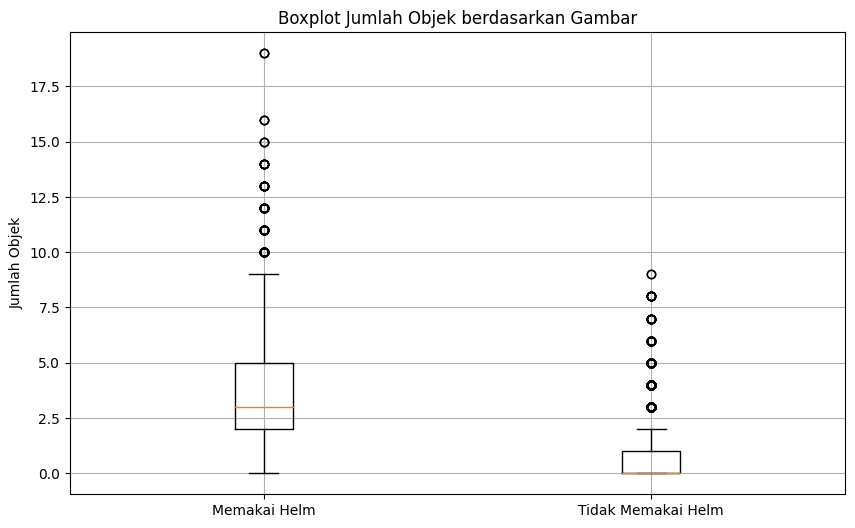

In [ ]:
def plot_boxplot(counts, title):
    class_0_counts = [count[0] for count in counts.values()]
    class_1_counts = [count[1] for count in counts.values()]

    data = [class_0_counts, class_1_counts]
    labels = ['Memakai Helm', 'Tidak Memakai Helm']

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)

    plt.ylabel('Jumlah Objek')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot combined boxplot
plot_boxplot(combined_counts, 'Boxplot Jumlah Objek berdasarkan Gambar')

In [ ]:
import numpy as np

class_0_counts = [count[0] for count in combined_counts.values()]
class_1_counts = [count[1] for count in combined_counts.values()]

# Calculate median and average for each class
median_class_0 = np.median(class_0_counts)
average_class_0 = np.mean(class_0_counts)
median_class_1 = np.median(class_1_counts)
average_class_1 = np.mean(class_1_counts)

print(f"Median for Class 0 (Memakai Helm): {median_class_0}")
print(f"Average for Class 0 (Memakai Helm): {average_class_0}")
print(f"Median for Class 1 (Tidak Memakai Helm): {median_class_1}")
print(f"Average for Class 1 (Tidak Memakai Helm): {average_class_1}")

Median for Class 0 (Memakai Helm): 3.0
Average for Class 0 (Memakai Helm): 3.3557037654578297
Median for Class 1 (Tidak Memakai Helm): 0.0
Average for Class 1 (Tidak Memakai Helm): 0.9037098791162984


In [ ]:
max(class_0_counts)

19

In [ ]:
max(class_1_counts)

9